In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

sns.set_style("white")
plt.style.use('_mpl-gallery')

# Same plots but with $a$ instead of $ab$ on the x-axis

In [2]:
E = 1
kcat = 1
K_A = 1
K_B = 10
Keq = 1

N = 100
X_range = np.linspace(-3, 5, N) # ln(a / K_A)
Y_range = np.linspace(0.1, 6, N) # theta = ln(Keq * a / b)
X, Y = np.meshgrid(X_range, Y_range)

A = np.exp(X) * K_A
A_over_B = np.exp(Y) / Keq
B = A / A_over_B

V = E * kcat * (1 - B / A / Keq) * (A/K_A) / (1 + A/K_A + B/K_B)

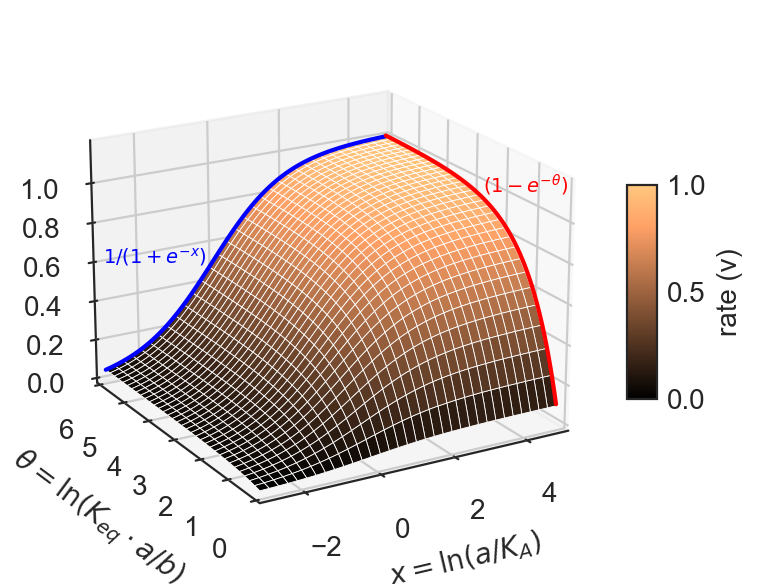

In [3]:
# Plot the surfaceax.plot([VecStart_x ,VecEnd_x],[VecStart_y,VecEnd_y],[VecStart_z,VecEnd_z])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=200, figsize=(4, 4))
ax.set_xlabel(r"$x = \ln(a/K_A)$")
ax.set_ylabel(r"$\theta = \ln(K_{eq} \cdot a / b)$")
ax.set_zlabel(r"rate ($v$)", rotation=90)
surf = ax.plot_surface(X, Y, V, vmin=0, vmax=1., cmap=cm.copper, rstride=3, cstride=3, linewidth=0.3, antialiased=True)
ax.plot(X_range, [Y.max()]*N, 1/(1+np.exp(-X_range)), color="blue")
ax.text(-3, 6, 0.6, r"$1/(1+e^{-x})$", fontsize=7, color="blue")
ax.plot([X.max()]*N, Y_range, (1-np.exp(-Y_range)), color="red")
ax.text(5, 2.6, 0.95, r"$(1-e^{-\theta})$", fontsize=7, color="red")

ax.set_xlim(X.min(), X.max())
ax.set_ylim(0, Y.max())
ax.set_zlim(0, 1.19)
ax.view_init(elev=20, azim=-120, roll=0)
ax.set_aspect("auto")
fig.colorbar(surf, shrink=0.3, aspect=7, label=r"rate (v)")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95)
#ax.set(zticklabels=[]);

fig.savefig("../figures/ratelaw_surface.pdf")

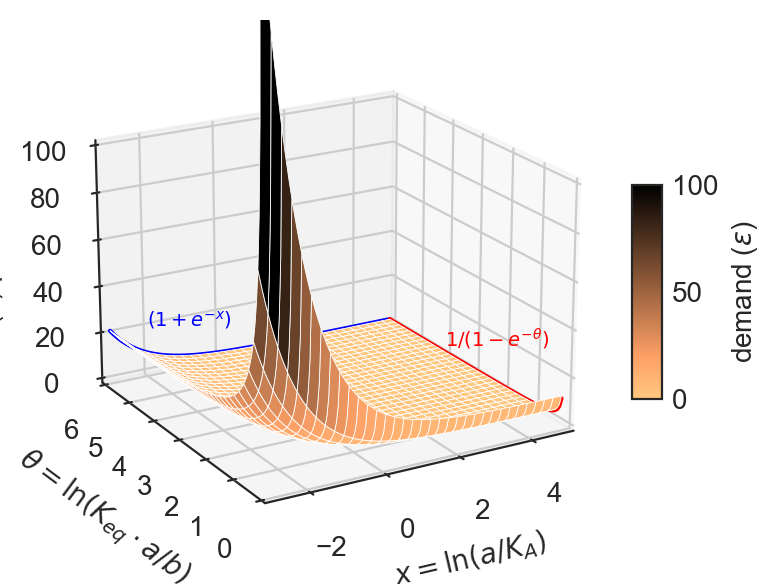

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=200, figsize=(4, 4))
ax.set_xlabel(r"$x = \ln(a/K_A )$")
ax.set_ylabel(r"$\theta = \ln(K_{eq} \cdot a / b)$")
ax.set_zlabel(r"demand ($\varepsilon$)")
ax.plot(X_range, [Y.max()]*N, (1+np.exp(-X_range)), color="blue", zorder=1)
ax.text(-2, 6, 20, r"$(1+e^{-x})$", fontsize=7, color="blue", zorder=1)
ax.plot([X.max()]*N, Y_range, 1/(1-np.exp(-Y_range)), color="red", zorder=1)
ax.text(5, 4, 3, r"$1/(1-e^{-\theta})$", fontsize=7, color="red", zorder=1)
surf = ax.plot_surface(X, Y, 1/V, vmin=0, vmax=100, cmap=cm.copper_r, rstride=3, cstride=3, linewidth=0.3, antialiased=True, zorder=2)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(0, Y.max())
ax.set_zlim(0, 100)
ax.view_init(elev=20, azim=-120, roll=0)
fig.colorbar(surf, shrink=0.3, aspect=7, label=r"demand ($\varepsilon$)")

#ax.set(zticklabels=[]);
ax.set_aspect("auto")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95)
fig.savefig("../figures/demand_surface.pdf")